<a href="https://colab.research.google.com/github/Yasminsallam4/Credit-card-Details/blob/main/Credit_card_Details_Binary_Classification_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('/content/Credit_card.csv')

In [4]:
df1.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [5]:
df1.shape

(1548, 18)

In [35]:
df2 = pd.read_csv('/content/Credit_card_label.csv')

In [36]:
df2.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [37]:
df2.shape

(1548, 2)

In [38]:
final_df = pd.merge(df1, df2, on='Ind_ID')

In [39]:
final_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [40]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [41]:
final_df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [42]:
final_df.drop(['Ind_ID', 'Type_Occupation', 'Birthday_count', 'Employed_days'], axis=1, inplace=True)

In [43]:
cat_col = []
num_col = []

In [44]:
for col in final_df.columns:
    if final_df[col].dtype == 'object':
        cat_col.append(col)
    else:
        num_col.append(col)

In [45]:
final_df.isnull().sum()

GENDER             7
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income     23
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Family_Members     0
label              0
dtype: int64

In [46]:
for col in cat_col:
    print(f'{col} :',final_df[col].unique())

GENDER : ['M' 'F' nan]
Car_Owner : ['Y' 'N']
Propert_Owner : ['Y' 'N']
Type_Income : ['Pensioner' 'Commercial associate' 'Working' 'State servant']
EDUCATION : ['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
Marital_status : ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
Housing_type : ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']


In [47]:
for col in cat_col:
    final_df[col].fillna('unknown', inplace=True)

In [48]:
for col in num_col:
    final_df[col].fillna(0, inplace=True)

In [49]:
final_df.isnull().sum()

GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
label             0
dtype: int64

Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
label_encoder = {}

In [52]:
for col in cat_col:
    label_encoder[col] = LabelEncoder()
    final_df[col] = label_encoder[col].fit_transform(final_df[col])

In [53]:
label_encoder

{'GENDER': LabelEncoder(),
 'Car_Owner': LabelEncoder(),
 'Propert_Owner': LabelEncoder(),
 'Type_Income': LabelEncoder(),
 'EDUCATION': LabelEncoder(),
 'Marital_status': LabelEncoder(),
 'Housing_type': LabelEncoder()}

Data Visualization

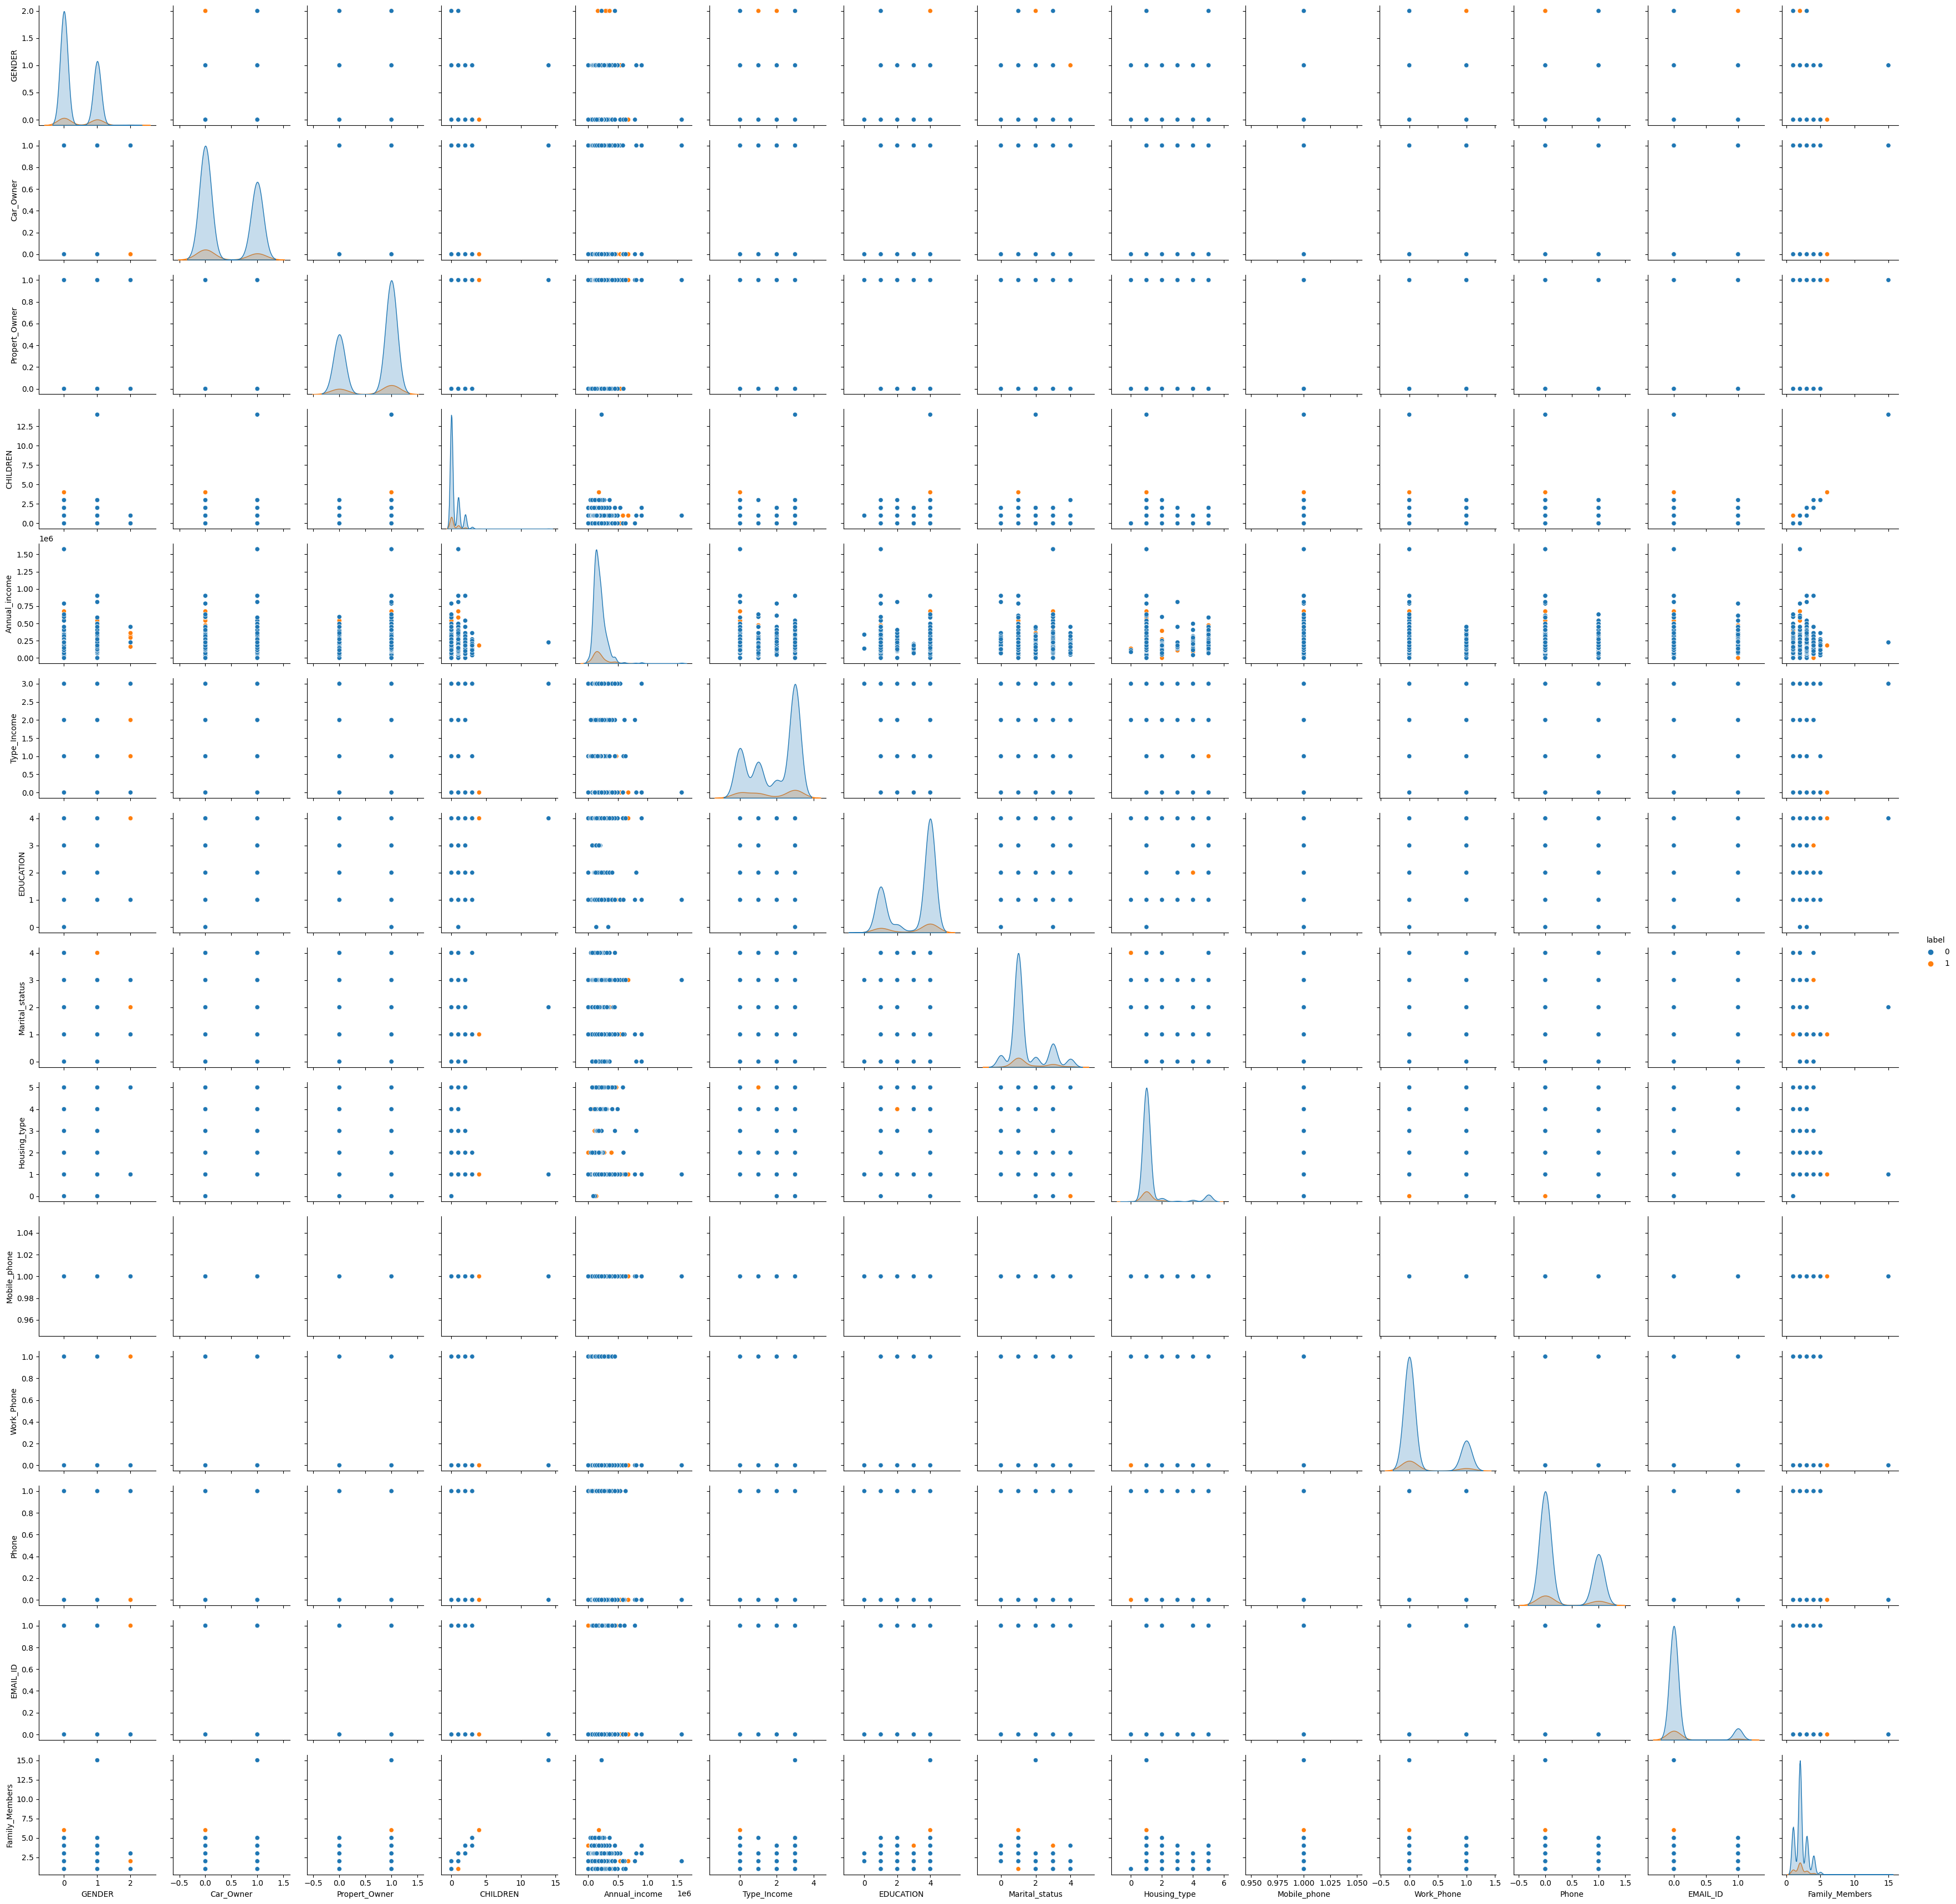

In [54]:
sns.pairplot(final_df, hue='label')
plt.show()

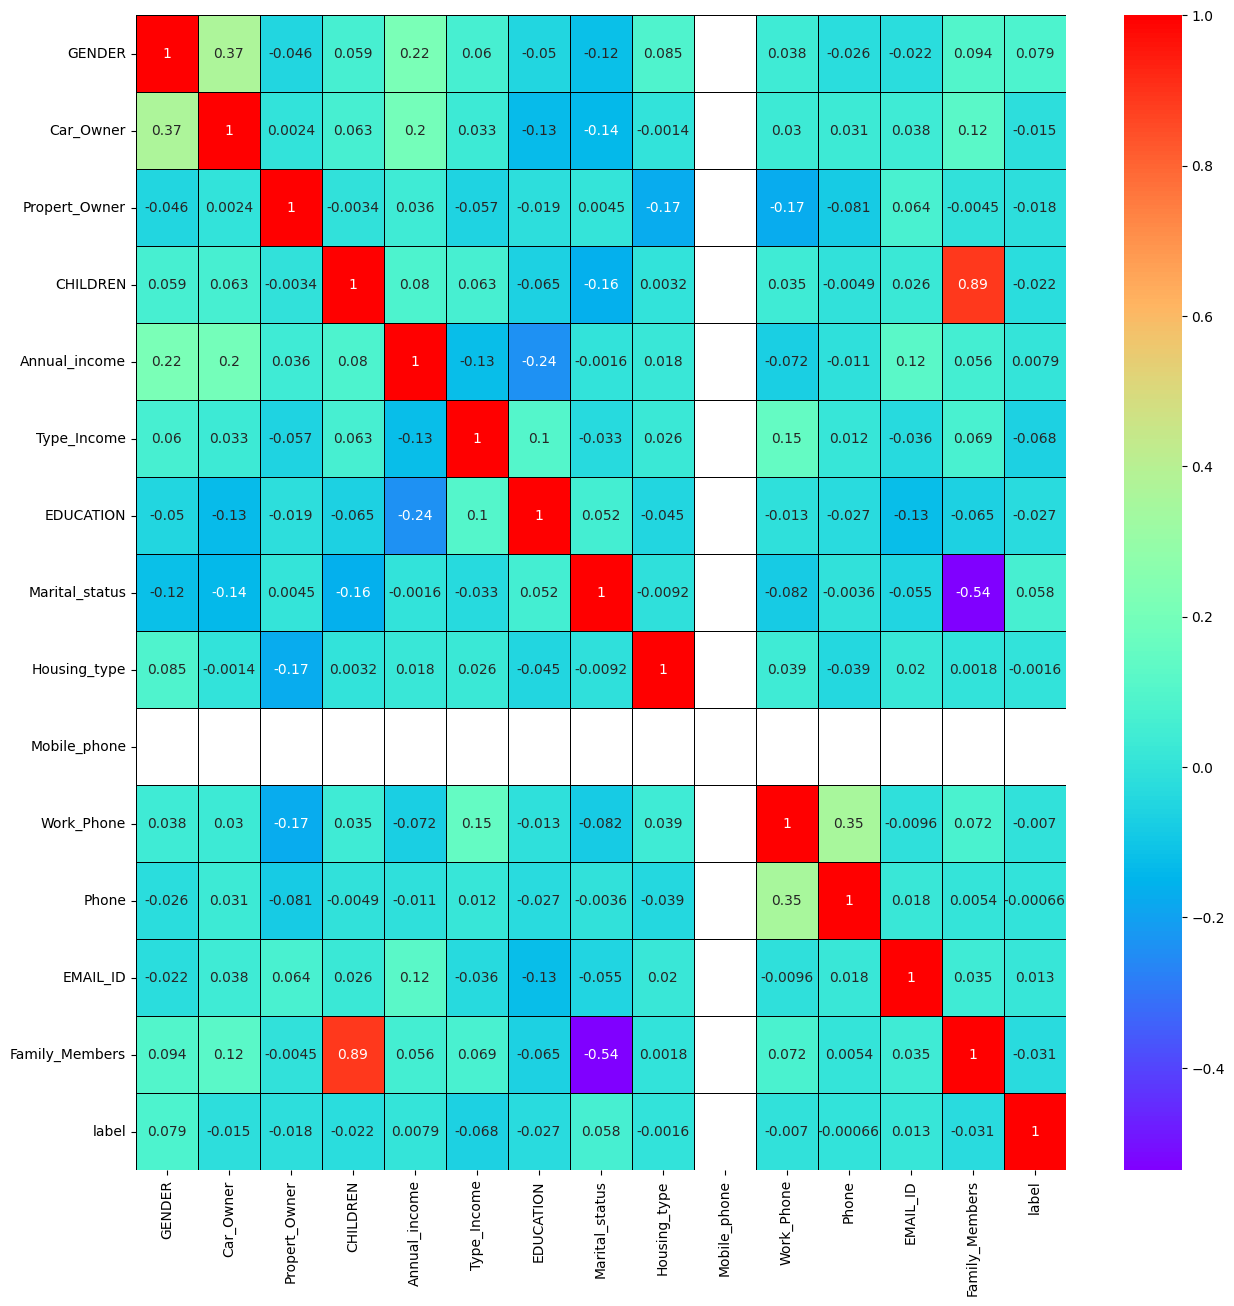

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(final_df.corr(), annot=True, cmap='rainbow', linecolor='black', linewidths=0.5)
plt.show()

In [56]:
final_df.drop(['Mobile_phone'], axis=1, inplace=True)

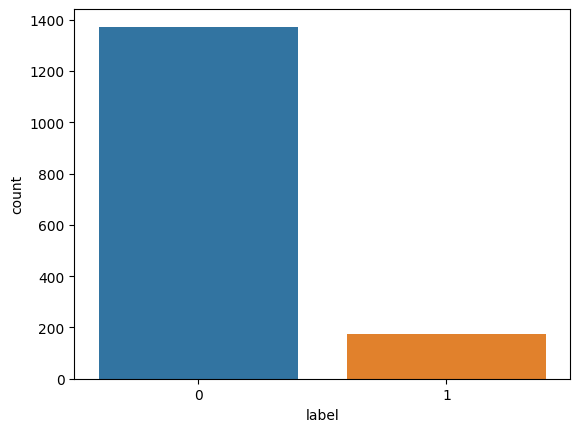

In [57]:
sns.countplot(data=final_df, x='label')
plt.show()


Train & Test split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = final_df.iloc[:,:-1]
X

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Work_Phone,Phone,EMAIL_ID,Family_Members
0,1,1,1,0,180000.0,1,1,1,1,0,0,0,2
1,0,1,0,0,315000.0,0,1,1,1,1,1,0,2
2,0,1,0,0,315000.0,0,1,1,1,1,1,0,2
3,0,1,0,0,0.0,0,1,1,1,1,1,0,2
4,0,1,0,0,315000.0,0,1,1,1,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0,0,1,0,0.0,0,1,1,1,0,0,0,2
1544,0,0,0,0,225000.0,0,2,3,1,0,0,0,1
1545,1,1,1,2,180000.0,3,1,1,1,0,0,0,4
1546,1,1,0,0,270000.0,3,4,0,1,1,1,0,2


In [60]:
y = final_df['label']
y

0       1
1       1
2       1
3       1
4       1
       ..
1543    0
1544    0
1545    0
1546    0
1547    0
Name: label, Length: 1548, dtype: int64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model

In [62]:
from sklearn.ensemble import RandomForestClassifier


In [63]:
RNF = RandomForestClassifier()

In [64]:

RNF.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
y_hat = RNF.predict(X_test)

Model Evaluation

In [66]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [67]:
accuracy_score(y_test, y_hat)

0.8935483870967742

In [68]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       280
           1       0.41      0.23      0.30        30

    accuracy                           0.89       310
   macro avg       0.67      0.60      0.62       310
weighted avg       0.87      0.89      0.88       310



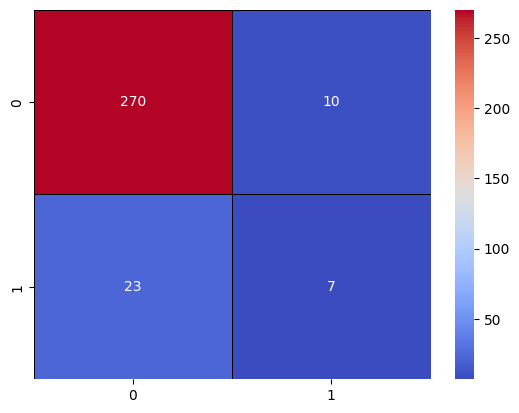

In [69]:
sns.heatmap(confusion_matrix(y_test, y_hat), cmap='coolwarm', fmt='.3g', annot=True, linecolor='black', linewidths=0.5)
plt.show()
